In [ ]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/
# Apriori is a algorithm for extracting frequent itemsets with applications in association rule learning (aka Market Basket).

import pandas as pd
from mlxtend.frequent_patterns import apriori

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

*   Raw data contains the users where they have activities in different FB Beauty related fan pages
*  Activities include likes, reactions or comments

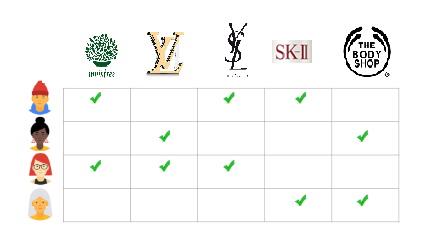

In [ ]:
# Construct the data as market basket format below and replace "NaN" as 0
df = pd.read_csv('https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/data/beautyFanPages.csv').fillna(0)
df

,ttttbeauty,alcoyanheecompany,amberbeautyhk,angelface.hongkong,ansonbeauty,armanibeautyHK,AromaBeautyShare,baromabeauty,beauskinhk,beauti360,...,TwinkleBeautyat,UDNICE,vanessabeautyltd,wholesalebeauty,winnieleung.hk,www.magiceyelashe.com.hk,YankeeBeautyHK,yokocolumn,youbeauty.com.hk,yslbeaute.hk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
21304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# show subset of the data
cols = ['LaneigeHongKong', 'HKinnisfree', 'TheBodyShopHongKong', 'Bioderma.HongKong', 'yslbeaute.hk', 'CliniqueHongKong', 'etude.hk', 'shuuemura.hk']
size = len(df)
df[cols][size-100: size-1]

,LaneigeHongKong,HKinnisfree,TheBodyShopHongKong,Bioderma.HongKong,yslbeaute.hk,CliniqueHongKong,etude.hk,shuuemura.hk
21206,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
21207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21208,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
21209,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
21210,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21300,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
21301,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
21302,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
21303,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# min_support is the ratio of itemset that occur together in all the transactions
# lower the min_support number -> easier to be selected
frequent_itemsets = apriori(df, min_support=0.002, use_colnames=True) 

# Add the length of the itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Display only the itemsets that has more than 2 items
result_items = frequent_itemsets[(frequent_itemsets['length'] > 2)]
result_items.sort_values(by=['support'], ascending=False)

#Use interactiave table to filter itemsets = 'HKinnisfree'

,support,itemsets,length
518,0.006289,"(GoodwillBeauty, mrslan.beauty, sugarbabebeauty)",3
517,0.006149,"(GoodwillBeauty, SkinVita, mrslan.beauty)",3
489,0.005679,"(HKonlineTVbeauty, GoodwillBeauty, mrslan.beauty)",3
509,0.005538,"(meso.mb, mrslan.beauty, GoodwillBeauty)",3
519,0.005398,"(GoodwillBeauty, mrslan.beauty, Tinabeautyskin...",3
...,...,...,...
449,0.002018,"(Fairykissme, HKonlineTVbeauty, hooray8t3)",3
531,0.002018,"(HKonlineTVbeauty, HKinnisfree, sugarbabebeauty)",3
754,0.002018,"(HKonlineTVbeauty, hooray8t3, mrslan.beauty, T...",4
534,0.002018,"(meso.mb, Neogence.HK, HKinnisfree)",3


In [ ]:
# Check a particular Fan Page for its associated Fan Pages
# Sort by support to see which frequent_itemsets is most strong

PAGE = 'HKinnisfree'
result_items[frequent_itemsets['itemsets'].astype(str).str.contains(PAGE)].sort_values(by=['support'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,support,itemsets,length
481,0.003802,"(GoodwillBeauty, mrslan.beauty, HKinnisfree)",3
429,0.003567,"(Bioderma.HongKong, TheBodyShopHongKong, HKinn...",3
484,0.003004,"(GoodwillBeauty, SkinVita, HKinnisfree)",3
478,0.002910,"(HKonlineTVbeauty, GoodwillBeauty, HKinnisfree)",3
435,0.002816,"(CliniqueHongKong, TheBodyShopHongKong, HKinni...",3
480,0.002769,"(meso.mb, GoodwillBeauty, HKinnisfree)",3
540,0.002722,"(SkinVita, mrslan.beauty, HKinnisfree)",3
483,0.002722,"(organicpuresense, GoodwillBeauty, HKinnisfree)",3
437,0.002675,"(etude.hk, LaneigeHongKong, HKinnisfree)",3
400,0.002581,"(etude.hk, beautyexchange.hk, HKinnisfree)",3


In [ ]:
### Investment Fund of Fund exercise
# Find a dataset with all the mutual funds/ETFs
# For each of the fund, list the Top 10 Holdings as the "market basket"
# Run the association rule learning algorithm to get the frequent itemsets as the new Funds
# Or search a stock in the "frequent itemsets" and see which other stocks are usually hold together with

In [ ]:
mutualFund = pd.read_csv('https://raw.githubusercontent.com/kenwkliu/ideas/master/colab/data/mutualFunds.csv', encoding= 'unicode_escape')
mutualFund.head(1000) # look at the first 1000 rows

In [ ]:
# Webscrape the fund Top 10 Holdings from "mutualfunds.com" with the fund_name
# Example: https://mutualfunds.com/funds/AAAAX